In [86]:
import json
from math import factorial
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt

In [87]:
def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

def c(n , r):
    return factorial(n) // (factorial(n - r) * factorial(r))

In [122]:
num_of_processes = 2
done = set([0])

while len(done) < num_of_processes + 1:
    indices = np.where(np.random.randint(2, size=3) == 1)[0]
    idx = (2**indices).sum()
    
    if idx in done:
        continue
        
    done.add(idx)
    print(indices, idx)

[0] 1
[0 1 2] 7


In [106]:
context_index

array([  0,   6,   8,   9,  11,  12,  13,  14,  15,  17,  18,  19,  21,
        22,  23,  24,  25,  29,  30,  31,  34,  35,  41,  42,  44,  45,
        46,  48,  50,  51,  52,  53,  54,  56,  58,  65,  67,  69,  70,
        71,  73,  74,  76,  77,  80,  82,  84,  86,  90,  93,  95,  97,
        98, 100, 102, 105, 106, 110, 111, 113, 116, 118, 119, 121, 122,
       123, 126, 127, 128, 131, 132, 133, 137, 141, 143, 148, 149, 150,
       152, 157, 158, 159, 162, 167, 168, 171, 172, 173, 174, 175, 176,
       178, 180, 181, 185, 186, 190, 192, 193, 196, 198, 201, 202, 204,
       206, 208, 210, 213, 215, 216, 217, 218, 220, 223, 225, 228, 230,
       232, 234, 236, 237, 239, 242, 244, 245, 246, 248, 252, 254, 255],
      dtype=int64)

In [ ]:
graph = []
graph_life = []

for i in range(combination_size):
    graph.append(read_json(f'cache/graph_{i}.json'))
    graph_life.append(read_json(f'cache/graph_life_{i}.json'))

In [ ]:
len(graph)

In [90]:
i = 4
for key, life in graph_life[i].items():
    print(key, life)

cu [1.0, 21]
on [1.0, 21]
ut [1.0, 21]
n_ [0.6190476190476191, 21]
t1 [0.8461538461538461, 13]
__ [1.0, 12]
1t [1.0, 14]
_o [1.0, 21]
t_ [0.2857142857142857, 21]
o3 [0.25, 4]
_6 [1.0, 2]
3~ [0.82, 50]
61 [0.25, 120]
~~ [0.2, 455]
12 [0.5344827586206896, 58]
23 [0.5614035087719298, 57]
34 [0.5636363636363636, 55]
45 [0.5454545454545454, 55]
56 [0.5454545454545454, 55]
67 [0.5660377358490566, 53]
78 [0.5769230769230769, 52]
89 [0.6, 50]
91 [0.3125, 160]
~0 [0.588477366255144, 243]
1~ [0.343030303030303, 825]
01 [0.14388489208633093, 139]
~1 [1.0, 145]
11 [0.4838709677419355, 62]
~2 [1.0, 133]
21 [0.37037037037037035, 81]
~3 [1.0, 122]
31 [0.32967032967032966, 91]
~4 [1.0, 113]
41 [0.29411764705882354, 102]
~5 [1.0, 101]
51 [0.27522935779816515, 109]
~6 [1.0, 90]
~7 [1.0, 78]
71 [0.23255813953488372, 129]
~8 [1.0, 68]
81 [0.2158273381294964, 139]
~9 [1.0, 54]
92 [0.37037037037037035, 27]
2~ [0.7721518987341772, 79]
02 [0.2702702702702703, 37]
22 [0.5882352941176471, 17]
32 [0.370370370370

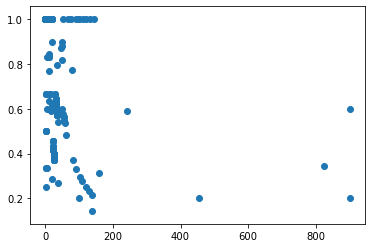

In [91]:
lives = np.array(list(graph_life[i].values()))
plt.scatter(lives[:,1], lives[:,0])

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(lives)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0])